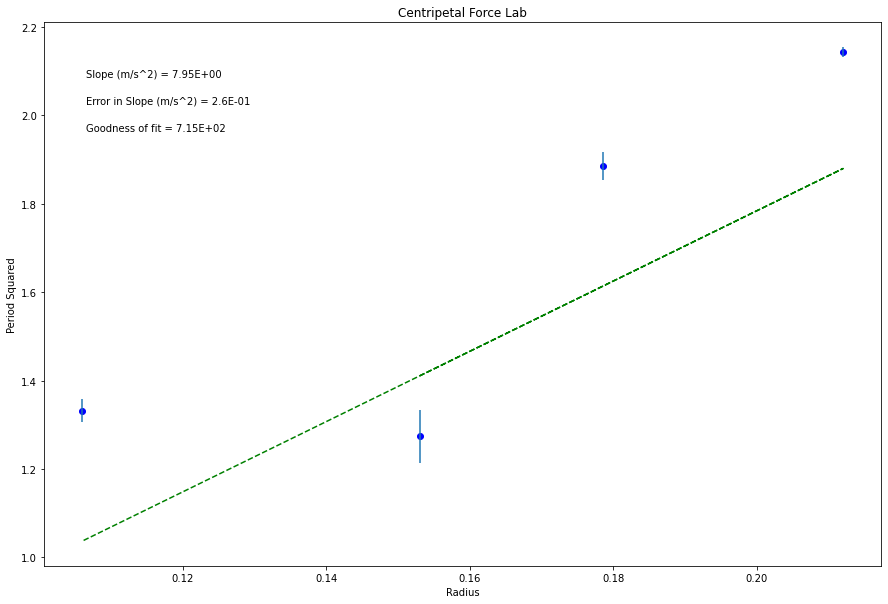

7.948862783417025  should equal  7.948862783417025
The sum of the centripetal forces is  1.0345321854269864  plus or minus  0.03390595750652784  Newtons.
The tension force is  0.8295875999999999  plus or minus  0.0009805999999999999  Newtons.
1.0345321854269864  should be within  0.03488655750652784  of  0.8295875999999999
0.8644741575065277


In [16]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018, Aug 2020(for Python 3.8)
#-------------------------------------------#
%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import numpy as np
import matplotlib.pyplot as plt


import math #added so I can use math.pi later :)


#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data

radius = np.array([0.153,0.1785,0.212,0.106]) #units: meters!
T_square = np.array([1.27373796,1.885129,2.14271044,1.331716]) #period squared: s^2


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_T_square = np.array([0.06069979714,0.03172788814,0.01172502886,0.02564893183]) # s^2


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = radius   #this should be the array you want to plot on the x axis
y = T_square
dy = err_T_square  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Radius')
plt.ylabel('Period Squared')
plt.title('Centripetal Force Lab')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (m/s^2) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (m/s^2) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()


#AFTER the plot
#this is the part where I found Fc in python out of sheer lazy


#calculation of centripetal force!

#slope is (4pi^2m)/(Sum(Fc)) = T^2/r
#which is to say the centripetal forces = (4pi^2m)/slope

slope = m
d_slope = dm

print(m," should equal ",slope) #check to make sure I did things right

m_cyl = 0.2083   #mass of the cylinder
d_mass = 0.0001  #uncertainty of masses measured on a scale

Fc = (4*((math.pi)**2)*m_cyl)/slope

d_Fc = Fc*((d_mass/m_cyl)**2+(-d_slope/slope)**2)**0.5

print("The sum of the centripetal forces is ",Fc," plus or minus ",d_Fc," Newtons.")

#what about Ft?

m_hex = 0.0846 #kg

Ft = m_hex*9.806
d_Ft = d_mass*9.806

print("The tension force is ",Ft," plus or minus ",d_Ft," Newtons.")

print(Fc," should be within ",d_Ft+d_Fc," of ",Ft)

print(Ft+d_Ft+d_Fc)

The sum of the centripetal forces is  1.0343841996210885  plus or minus  0.03383256176877433
